## Min-Max Scaling 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [12]:
df=pd.read_csv('wine_data.csv',usecols=[0,1,2])

In [13]:
df.sample(5)

,1,14.23,1.71
88,2,12.08,1.33
41,1,13.88,1.89
46,1,13.90,1.68
79,2,12.00,0.92
147,3,13.32,3.24


In [14]:
df.columns=["Class Label", "Alcohol", "Malic Acid"]

In [16]:
df.sample(5)

,Class Label,Alcohol,Malic Acid
94,2,12.47,1.52
170,3,12.77,2.39
16,1,13.83,1.57
87,2,11.64,2.06
53,1,13.74,1.67


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test =train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.2, random_state=42)

In [23]:
X_train.shape ,X_test.shape

((141, 2), (36, 2))

In [24]:
X_train.head()

,Alcohol,Malic Acid
156,12.45,3.03
136,12.53,5.51
98,12.29,3.17
158,13.48,1.67
38,14.22,3.99


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
X_train_scaled


array([[0.30409357, 0.45256917],
       [0.32748538, 0.94268775],
       [0.25730994, 0.48023715],
       [0.60526316, 0.18379447],
       [0.82163743, 0.64229249],
       [0.05847953, 0.12055336],
       [0.21929825, 0.17193676],
       [0.23391813, 0.08893281],
       [0.64619883, 0.83201581],
       [0.86549708, 0.23913043],
       [0.34795322, 0.11857708],
       [0.47953216, 1.        ],
       [0.34210526, 0.10869565],
       [0.70467836, 0.19960474],
       [0.12573099, 0.42490119],
       [0.5497076 , 0.243083  ],
       [0.55263158, 0.19367589],
       [0.53216374, 0.50592885],
       [0.18421053, 0.70355731],
       [0.29532164, 0.35770751],
       [0.37719298, 0.61857708],
       [0.47953216, 0.1798419 ],
       [0.06140351, 0.24703557],
       [0.42105263, 0.16996047],
       [0.72222222, 0.84980237],
       [0.28070175, 0.06521739],
       [0.25730994, 0.17193676],
       [0.4122807 , 0.51976285],
       [0.68421053, 0.19565217],
       [0.7748538 , 0.27865613],
       [0.

In [32]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [33]:
X_train_scaled.sample(5)

,Alcohol,Malic Acid
30,0.719298,0.229249
73,0.000000,0.000000
94,0.710526,0.667984
82,0.546784,0.177866
118,0.804094,0.349802


In [34]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,141.0,141.0
mean,13.0,2.3
std,0.8,1.2
min,11.4,0.7
25%,12.3,1.6
50%,13.0,1.8
75%,13.6,3.0
max,14.8,5.8


In [36]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,141.0,141.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.6,0.5
max,1.0,1.0


## impact of the min max scaling 

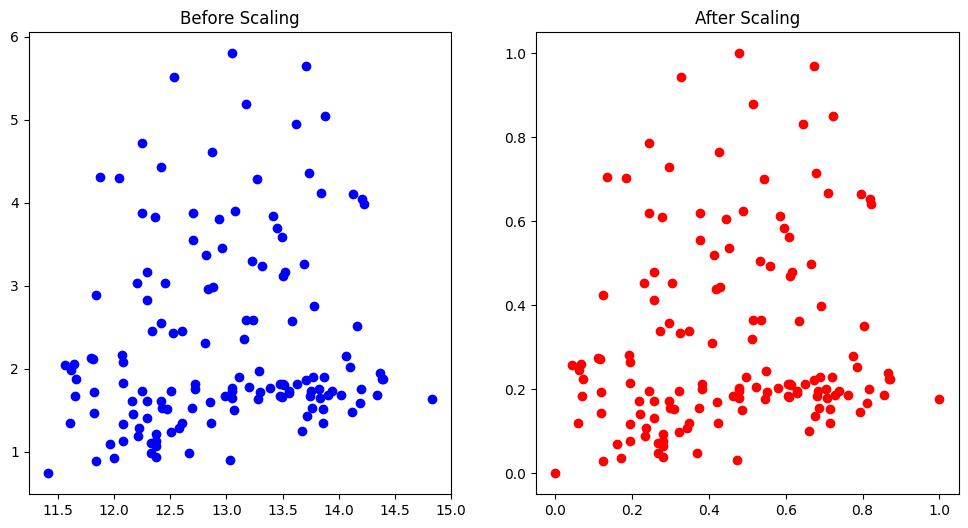

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.set_title("Before Scaling")
ax1.scatter(X_train["Alcohol"],X_train["Malic Acid"],color="blue")
ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled["Alcohol"],X_train_scaled["Malic Acid"],color="red")

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

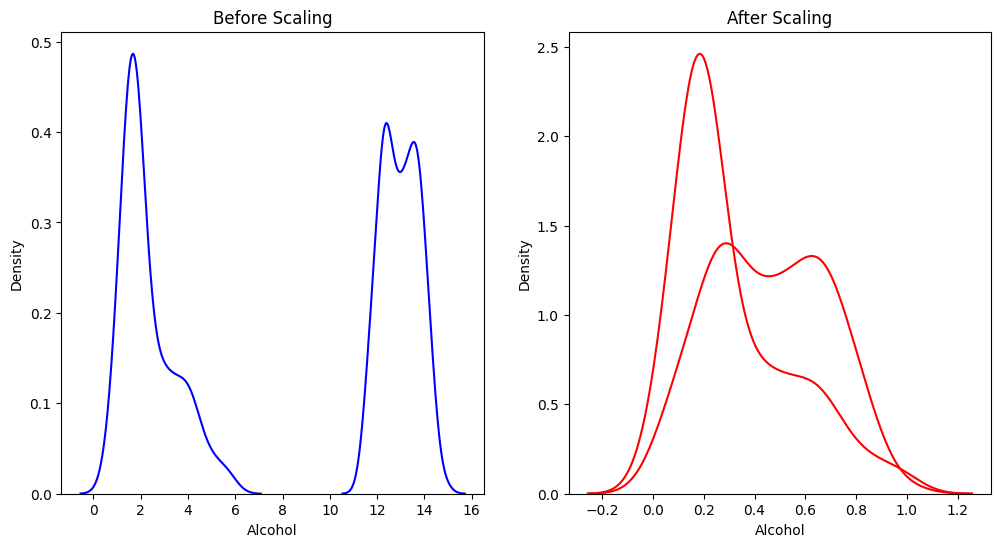

In [60]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,6))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Alcohol"],color="blue",ax=ax1)
sns.kdeplot(X_train["Malic Acid"],color="blue",ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Alcohol"],color="red")
sns.kdeplot(X_train_scaled["Malic Acid"],color="red")